In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
predicted_labels = kmeans.fit_predict(X)

/Users/saisrithaja/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [4]:
centroids = kmeans.cluster_centers_

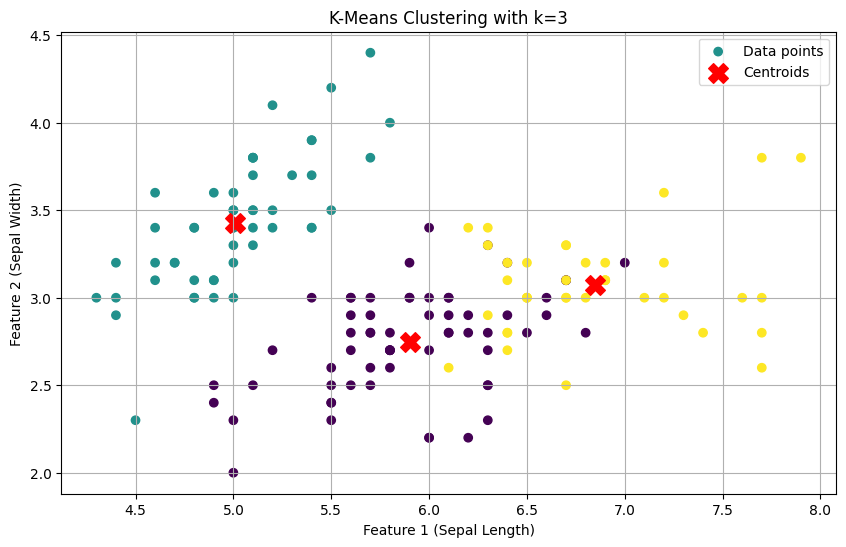

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', marker='o', label='Data points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with k=3')
plt.xlabel('Feature 1 (Sepal Length)')
plt.ylabel('Feature 2 (Sepal Width)')
plt.legend()
plt.grid()
plt.show()

In [6]:
inertia = []  
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

/Users/saisrithaja/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/saisrithaja/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/saisrithaja/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/saisrithaja/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The 

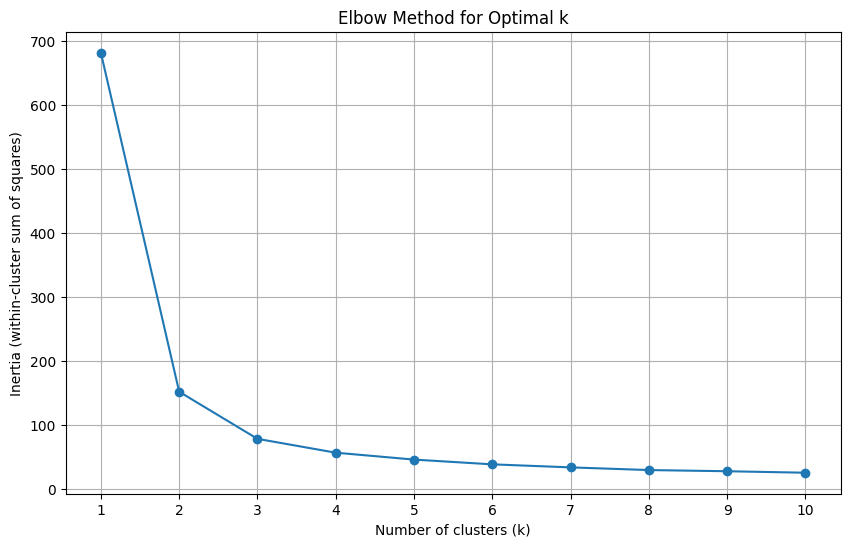

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.xticks(k_range)
plt.grid()
plt.show()

In [8]:
silhouette_avg = silhouette_score(X, predicted_labels)

silhouette_avg

0.5528190123564095

In [ ]:
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
data = sns.load_dataset('tips')
X = data[['total_bill', 'tip']]

Z = linkage(X, method='ward')

max_d = 3 
data['hierarchical_cluster'] = fcluster(Z, max_d, criterion='maxclust')

In [ ]:
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15.)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.axhline(y=10, color='r', linestyle='--', label='Threshold (y=10)')
plt.legend()
plt.show()


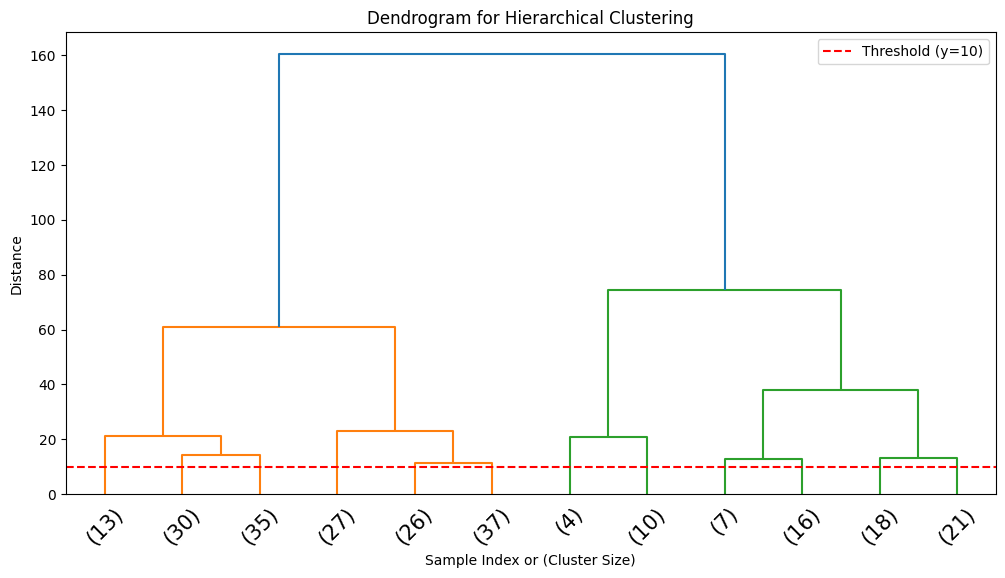

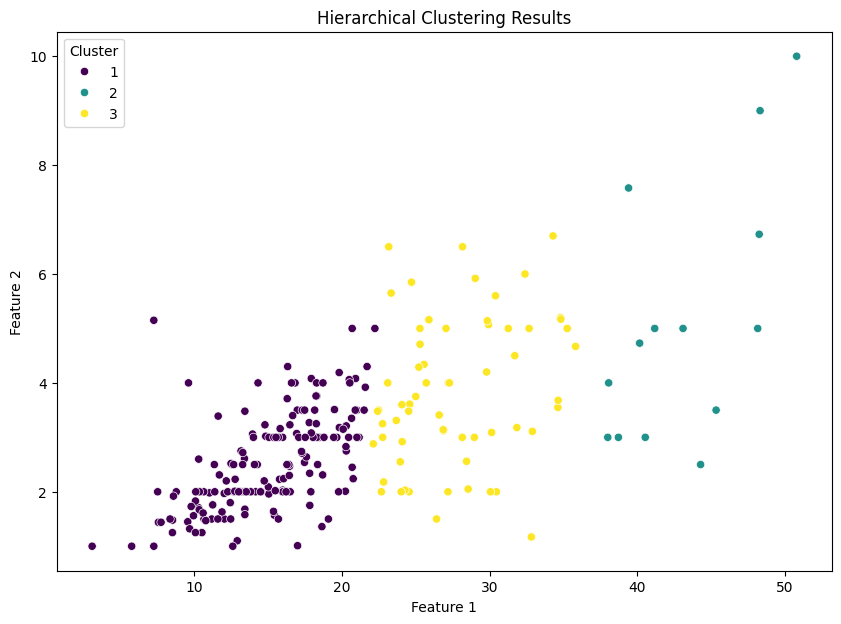

In [4]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=data['hierarchical_cluster'], palette='viridis')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()
